# From Weight of Evidence to Logistic Regression

This notebook documents some experiments with categorical data to show the relationship between MLE and WOE.

Author: https://github.com/deburky

## Example from Y. Pawitan - In All Likelihood

This example shows the calculation of MLE for a 2x2 table and test of binomial proportions with Chi-square test.

In [1]:
import pandas as pd

# Create a list for binary rows
data = [{"Condition": "Present", "Spread": 1} for _ in range(5)]
data.extend([{"Condition": "Present", "Spread": 0} for _ in range(1)])
data.extend([{"Condition": "Absent", "Spread": 1} for _ in range(10)])
data.extend([{"Condition": "Absent", "Spread": 0} for _ in range(9)])

df_binary = pd.DataFrame(data)
df_binary['Condition'] = df_binary['Condition'].apply(lambda x: 1 if x == 'Present' else 0)

In [2]:
from fisher_scoring import FisherScoringLogisticRegression

X = df_binary['Condition'].values.reshape(-1, 1)
y = df_binary['Spread']

model = FisherScoringLogisticRegression()
model.fit(X, y)

model.display_summary(style='dodger_blue1')

╭── Fisher Scoring Logistic Regression Fit ──╮
│                                            │
│         Total Fisher Scoring Iterations: 6 │
│         Log Likelihood: -15.8468           │
│         Beta 0 = intercept (bias): True    │
│                                            │
╰────────────────────────────────────────────╯

                      Fisher Scoring Logistic Regression Summary                      
┏━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃ Parameter ┃ Estimate ┃ Std. Error ┃ Wald Statistic ┃ P-value ┃ Lower CI ┃ Upper CI ┃
┡━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩
│    Beta 0 │ 0.1054   │ 0.4595     │ 0.2293         │ 0.8186  │ -0.7952  │ 1.0059   │
│    Beta 1 │ 1.5041   │ 1.1879     │ 1.2662         │ 0.2055  │ -0.8242  │ 3.8323   │
└───────────┴──────────┴────────────┴────────────────┴─────────┴──────────┴──────────┘

## Example from ML Primer

This example is from a very good paper [Maximum Likelihood, Profile Likelihood, and Penalized Likelihood: A Primer](https://academic.oup.com/aje/article-abstract/179/2/252/123902?redirectedFrom=fulltext#google_vignette).

In [3]:
import pandas as pd

# Define the data in binary format
data = {
    "x": [1] * 12 + [1] * 2 + [0] * 7 + [0] * 9,
    "y": [1] * 12 + [0] * 2 + [1] * 7 + [0] * 9
}

# Create a DataFrame
df_binary = pd.DataFrame(data)

In [4]:
from fisher_scoring import FisherScoringLogisticRegression

X = df_binary['x'].values.reshape(-1, 1)
# X = np.where(df_binary['x'] == 1, 1, -1).reshape(-1, 1)
y = df_binary['y']

model = FisherScoringLogisticRegression()
model.fit(X, y)

b0, b1 = model.beta.ravel()

model.display_summary(style='dodger_blue1')

╭── Fisher Scoring Logistic Regression Fit ──╮
│                                            │
│         Total Fisher Scoring Iterations: 6 │
│         Log Likelihood: -16.7067           │
│         Beta 0 = intercept (bias): True    │
│                                            │
╰────────────────────────────────────────────╯

                      Fisher Scoring Logistic Regression Summary                      
┏━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃ Parameter ┃ Estimate ┃ Std. Error ┃ Wald Statistic ┃ P-value ┃ Lower CI ┃ Upper CI ┃
┡━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩
│    Beta 0 │ -0.2513  │ 0.5040     │ -0.4987        │ 0.6180  │ -1.2390  │ 0.7364   │
│    Beta 1 │ 2.0431   │ 0.9150     │ 2.2328         │ 0.0256  │ 0.2496   │ 3.8365   │
└───────────┴──────────┴────────────┴────────────────┴─────────┴──────────┴──────────┘

In [5]:
import numpy as np
from optbinning import BinningProcess

binning_process = BinningProcess(variable_names=['x'])
binning_process.fit(df_binary['x'].values.reshape(-1, 1), df_binary['y'])

woe_1, woe_0 = -np.unique(binning_process.transform(df_binary['x'].values.reshape(-1, 1)))

sample_log_odds = np.log(df_binary['y'].mean() / (1 - df_binary['y'].mean()))

log_odds_1 = sample_log_odds + woe_1
log_odds_0 = sample_log_odds + woe_0

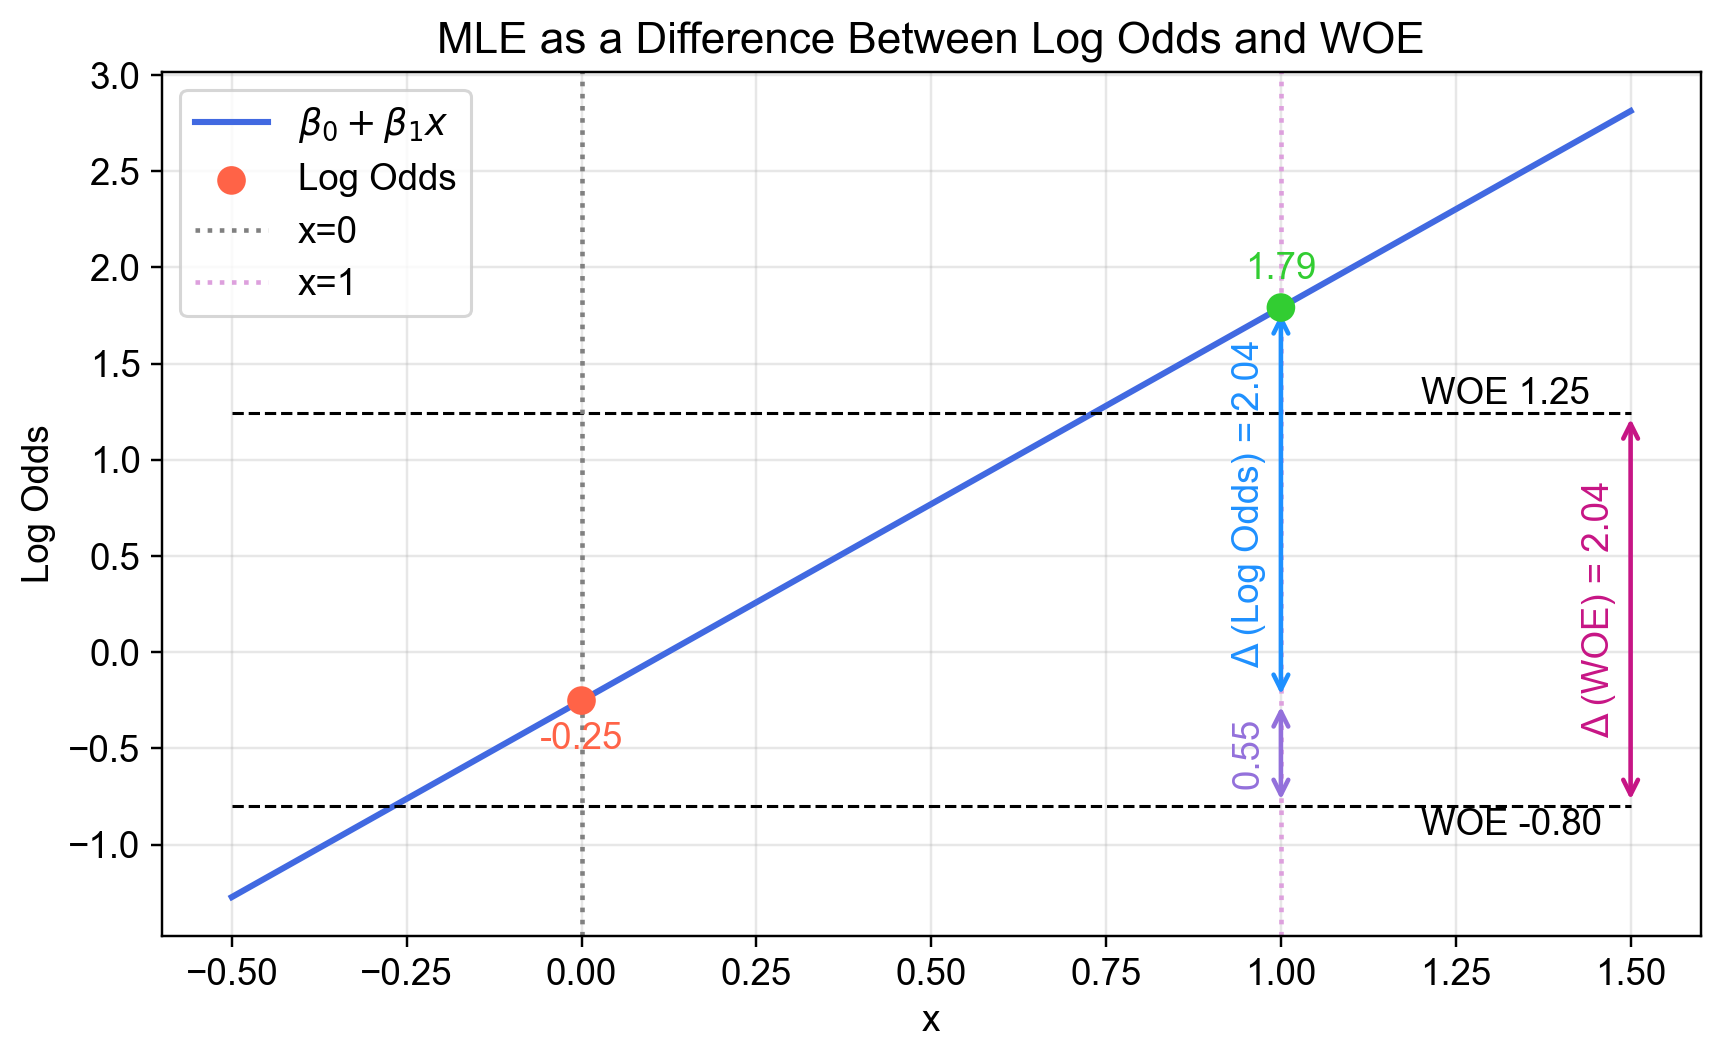

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

# Set font to Arial
plt.rcParams["font.family"] = "Arial"
# Set fontsize to 14
plt.rcParams.update({"font.size": 12})

# X values for regression line
x = np.linspace(-0.5, 1.5, 100)
log_odds_line = b0 + b1 * x

# Create the plot
plt.figure(figsize=(8, 5), dpi=110)

# Plot regression line
plt.plot(
    x,
    log_odds_line,
    label="$\\beta_0 + \\beta_1 x$",
    color="royalblue",
    linewidth=2,
)

# Add points for log-odds at x=0 and x=1
plt.scatter(
    [0, 1],
    [log_odds_0, log_odds_1],
    color=["tomato", "limegreen"],
    zorder=5,
    s=70,
    label="Log Odds",
)
plt.text(
    0, log_odds_0 - 0.25, f"{log_odds_0:.2f}", ha="center", color="tomato",
)
plt.text(
    1, log_odds_1 + 0.15, f"{log_odds_1:.2f}", ha="center", color="limegreen",
)

# Add WOE levels as horizontal lines
plt.hlines(
    [woe_0, woe_1],
    xmin=-0.5,
    xmax=1.5,
    colors=["black", "black"],
    linestyles="--",
    linewidth=1.0,
)
plt.text(1.2, woe_0 - 0.1, f"WOE {woe_0:.2f}", va="center", color="black")
plt.text(1.2, woe_1 + 0.1, f"WOE {woe_1:.2f}", va="center", color="black")

# Highlight differences
# Log odds difference
plt.annotate(
    "",
    xy=(1, log_odds_1),
    xytext=(1, log_odds_0),
    arrowprops=dict(arrowstyle="<->", color="dodgerblue", lw=1.5),
)
plt.text(
    0.93,
    (log_odds_0 + log_odds_1) / 2,
    f"Δ (Log Odds) = {log_odds_1 - log_odds_0:.2f}",
    color="dodgerblue",
    # fontsize=9,
    rotation=90,
    va="center",
)

# WOE difference
plt.annotate(
    "",
    xy=(1.5, woe_1),
    xytext=(1.5, woe_0),
    arrowprops=dict(arrowstyle="<->", color="mediumvioletred", lw=1.5),
)
plt.text(
    1.43,
    (woe_0 + woe_1) / 2,
    f"Δ (WOE) = {woe_1 - woe_0:.2f}",
    color="mediumvioletred",
    # fontsize=9,
    rotation=90,
    va="center",
)

# Difference between log odds and WOE
plt.annotate(
    "",
    xy=(1.0, (woe_0)),
    xytext=(1.0, (log_odds_0)),
    arrowprops=dict(arrowstyle="<->", color="mediumpurple", lw=1.5),
)
plt.text(
    0.93,
    (woe_0 + log_odds_0) / 2,
    f"{log_odds_0 - woe_0:.2f}",
    color="mediumpurple",
    # fontsize=9,
    rotation=90,
    va="center",
)

# Add vertical reference lines for x=0 and x=1
plt.axvline(0, color="gray", linestyle=":", label="x=0")
plt.axvline(1, color="plum", linestyle=":", label="x=1")

# Title and labels
plt.title("MLE as a Difference Between Log Odds and WOE")
plt.xlabel("x")
plt.ylabel("Log Odds")
plt.grid(alpha=0.3)
plt.legend(loc="upper left", fontsize=12)
plt.tight_layout()
plt.show()

# $x \in \{0, 1, 2\}$

In [7]:
import pandas as pd
import numpy as np
from fisher_scoring import FisherScoringLogisticRegression

# Define the data for three categories
# x=0, x=1, x=2 with corresponding y=1 and y=0 counts
data = {
    "x": [0] * 10 + [1] * 8 + [2] * 12 + [0] * 6 + [1] * 4 + [2] * 8,  # Categories
    "y": [1] * 10 + [1] * 8 + [1] * 12 + [0] * 6 + [0] * 4 + [0] * 8   # Outcomes
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate WOE values for each category
woe_df = df.groupby("x").apply(lambda group: pd.Series({
    "y=1_count": group[group["y"] == 1].shape[0],
    "y=0_count": group[group["y"] == 0].shape[0]
})).reset_index()

# Add totals
total_y1 = df[df["y"] == 1].shape[0]
total_y0 = df[df["y"] == 0].shape[0]
woe_df["p(x|y=1)"] = woe_df["y=1_count"] / total_y1
woe_df["p(x|y=0)"] = woe_df["y=0_count"] / total_y0
woe_df["WOE"] = np.log(woe_df["p(x|y=1)"] / woe_df["p(x|y=0)"])

# Logistic Regression using sklearn
X = pd.get_dummies(df["x"], drop_first=True)
y = df["y"]

# Fit the logistic regression model
log_reg = FisherScoringLogisticRegression(use_bias=True)
log_reg.fit(X, y)

print(log_reg.display_summary(style='dodger_blue1'))

# Extract coefficients
intercept = log_reg.beta[0].ravel()
coefficients = log_reg.beta[1:].ravel()

# Display results
print("WOE Calculation:")
print(woe_df)
print("\nLogistic Regression Coefficients:")
print(f"Intercept: {intercept}")
print(f"Coefficients for x=1 and x=2: {coefficients}")

mle_difference = coefficients[0] - coefficients[1]
woe_difference = woe_df['WOE'].iloc[-2] - woe_df['WOE'].iloc[-1]

np.testing.assert_almost_equal(mle_difference, woe_difference, decimal=3)

/var/folders/k_/yz8rvp25185_js60dw8vhnj40000gn/T/ipykernel_16232/78240503.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  woe_df = df.groupby("x").apply(lambda group: pd.Series({


╭── Fisher Scoring Logistic Regression Fit ──╮
│                                            │
│         Total Fisher Scoring Iterations: 5 │
│         Log Likelihood: -31.6834           │
│         Beta 0 = intercept (bias): True    │
│                                            │
╰────────────────────────────────────────────╯

                         Fisher Scoring Logistic Regression Summary                          
┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃        Parameter ┃ Estimate ┃ Std. Error ┃ Wald Statistic ┃ P-value ┃ Lower CI ┃ Upper CI ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩
│ intercept (bias) │ 0.5108   │ 0.5164     │ 0.9892         │ 0.3226  │ -0.5013  │ 1.5229   │
│                1 │ 0.1823   │ 0.8010     │ 0.2276         │ 0.8200  │ -1.3877  │ 1.7523   │
│                2 │ -0.1054  │ 0.6892     │ -0.1529        │ 0.8785  │ -1.4562  │ 1.2455   │
└──────────────────┴──────────┴────────────┴────────────────┴─────────┴──────────┴──────────┘

None
WOE Calculation:
   x  y=1_count  y=0_count  p(x|y=1)  p(x|y=0)       WOE
0  0         10          6  0.333333  0.333333  0.000000
1  1          8          4  0.266667  0.222222  0.182322
2  2         12          8  0.400000  0.444444 -0.105361

Logistic Regression Coefficients:
Intercept: [0.51082562]
Coefficients for x=1 and x=2: [ 0.18232156 -0.10536052]


## ResumeNames

https://rdrr.io/cran/AER/man/ResumeNames.html

In [8]:
import pandas as pd
from scipy.stats import chi2_contingency

# Dataset from Applied Econometrics with R
df = pd.read_csv("datasets/AER/ResumeNames.csv")

variable = 'industry'
response = 'computer'

df_sum = pd.crosstab(df[variable], df[response], normalize='index')

df_sum['ratio'] = np.log(df_sum['yes'] / df_sum['no'])

chi2, _, _, _ = chi2_contingency(pd.crosstab(df[variable], df[response]))
n = df.shape[0]
v = np.sqrt(chi2 / (n * (min(df[variable].nunique(), df[response].nunique()) - 1)))
print(f"Cramer's V: {v:.4f}")

Cramer's V: 0.2417


In [21]:
import statsmodels.api as sm
from optbinning import BinningProcess
from statsmodels.api import Logit
from fisher_scoring import FisherScoringLogisticRegression

df = df[df[variable].isin(['manufacturing', 'business/personal services', 'health/education/social services'])]
X = pd.get_dummies(df[variable], drop_first=False).astype(int)
X = X.drop(columns=['manufacturing'])
y = df[response].apply(lambda x: 1 if x == 'yes' else 0)

# Logistic Regression
model = FisherScoringLogisticRegression()
model.fit(X, y)

model.display_summary(style='dodger_blue1')

model_sm = Logit(y, sm.add_constant(X))
result = model_sm.fit()
print(result.summary())

# WOE
binning_process = BinningProcess(variable_names=[variable])
binning_process.fit(df[variable].values.reshape(-1, 1), y)

# woes = np.unique(binning_process.transform(df[variable].values.reshape(-1, 1)))
woes = list(
    -binning_process
    .get_binned_variable(variable).binning_table
    .build()['WoE']
    .head(df[variable].nunique())
)

sample_log_odds = np.log(y.mean() / (1 - y.mean()))

log_odds = sample_log_odds + woes

print(f"Sample Log Odds: {sample_log_odds:.4f}")
print(f"WOE values: {woes}")
print(f"Log Odds: {log_odds}")

log_odds_diff_1 = log_odds[0]
woe_diff_1 = woes[0] + sample_log_odds

print(f"\nLog Odds Difference: {log_odds_diff_1:.4f}")
print(f"WOE Difference: {woe_diff_1:.4f}")

log_odds_diff = log_odds[1] - log_odds[0]
woe_diff = woes[1] - woes[0]

print(f"Log Odds Difference: {log_odds_diff:.4f}")
print(f"WOE Difference: {woe_diff:.4f}")

log_odds_diff_3 = log_odds[2] - log_odds[0]
woe_diff_3 = woes[2] - woes[0]

print(f"Log Odds Difference: {log_odds_diff_3:.4f}")
print(f"WOE Difference: {woe_diff_3:.4f}")

╭── Fisher Scoring Logistic Regression Fit ──╮
│                                            │
│         Total Fisher Scoring Iterations: 7 │
│         Log Likelihood: -944.1004          │
│         Beta 0 = intercept (bias): True    │
│                                            │
╰────────────────────────────────────────────╯

                                 Fisher Scoring Logistic Regression Summary                                  
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃                        Parameter ┃ Estimate ┃ Std. Error ┃ Wald Statistic ┃ P-value ┃ Lower CI ┃ Upper CI ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩
│                 intercept (bias) │ 1.4302   │ 0.1260     │ 11.3464        │ 0.0000  │ 1.1831   │ 1.6772   │
│       business/personal services │ 0.3385   │ 0.1485     │ 2.2796         │ 0.0226  │ 0.0475   │ 0.6295   │
│ health/education/social services │ 1.0547   │ 0.1859     │ 5.6730         │ 0.0000  │ 0.6903   │ 1.4191   │
└──────────────────────────────────┴──────────┴────────────┴────────────────┴─────────┴──────────┴──────────┘

Optimization terminated successfully.
         Current function value: 0.383469
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               computer   No. Observations:                 2462
Model:                          Logit   Df Residuals:                     2459
Method:                           MLE   Df Model:                            2
Date:                Thu, 23 Jan 2025   Pseudo R-squ.:                 0.01913
Time:                        22:05:12   Log-Likelihood:                -944.10
converged:                       True   LL-Null:                       -962.51
Covariance Type:            nonrobust   LLR p-value:                 1.008e-08
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                1.4302      0.126     11.34

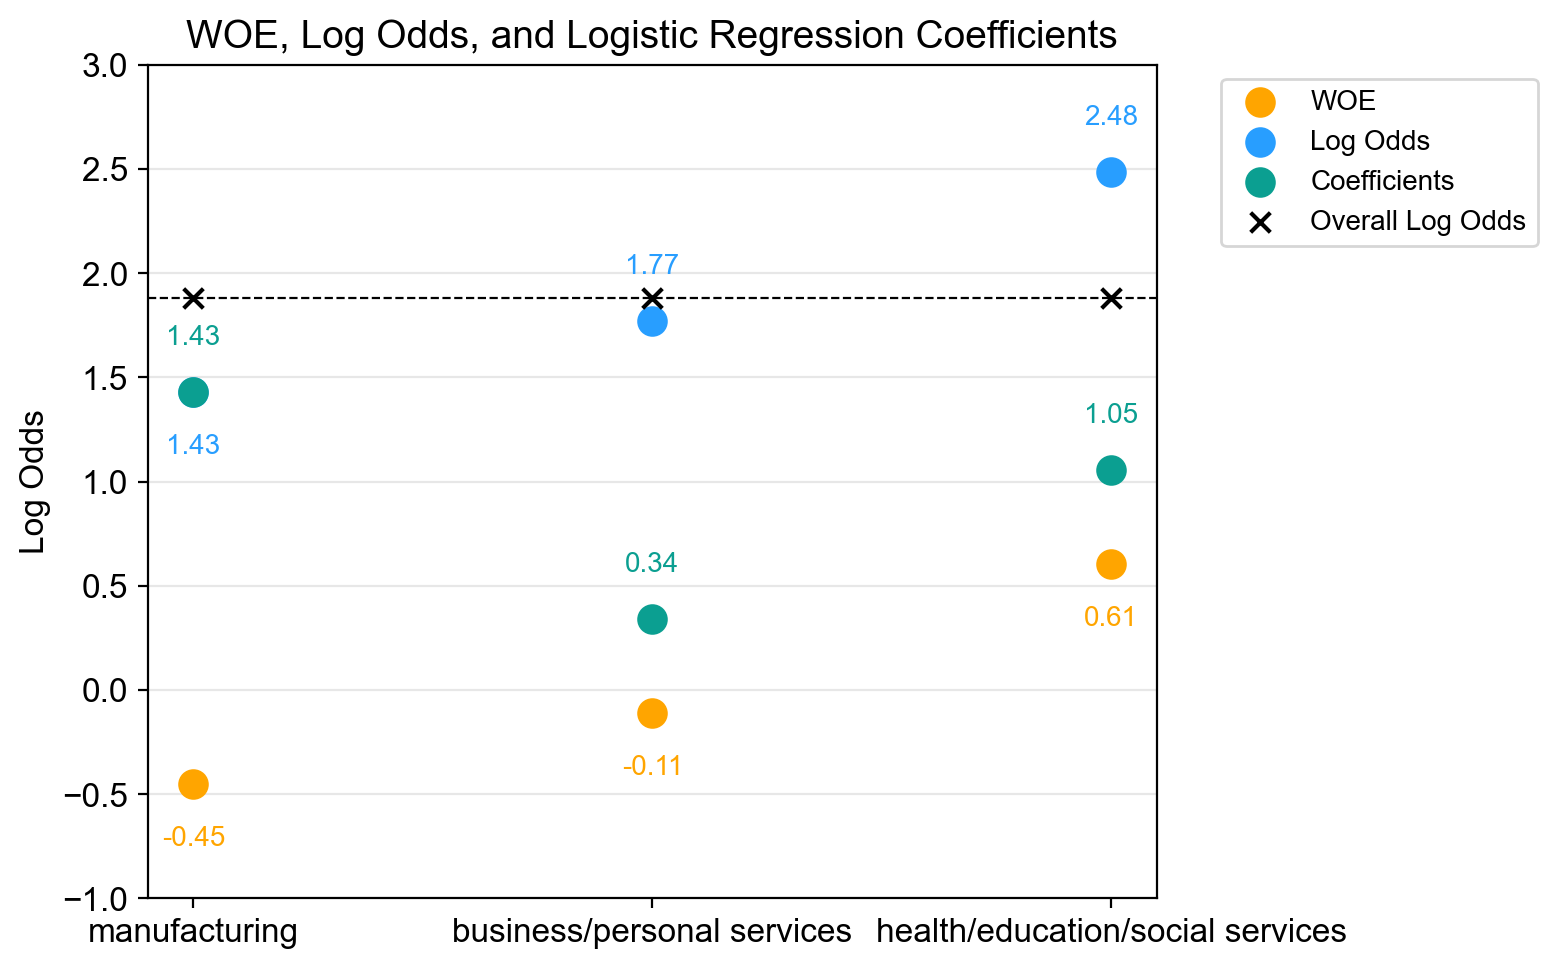

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Data from your experiment
categories = ["manufacturing", "business/personal services", "health/education/social services"]
coefficients = [model.beta.ravel()[0], model.beta.ravel()[1], model.beta.ravel()[2]]

sample_log_odds_ = np.ones(3) * sample_log_odds

# Create the plot
fig, ax = plt.subplots(figsize=(8, 5))

# Plot WOE values
ax.scatter(categories, woes, color="orange", s=100, label="WOE", zorder=3)
for i, w in enumerate(woes):
    ax.text(i, w - 0.2, f"{w:.2f}", ha="center", va="top", fontsize=10, color="orange")

# Plot Log Odds values
ax.scatter(categories, log_odds, color="#289eff", s=100, label="Log Odds", zorder=3)
for i, l in enumerate(log_odds):
    # If first add an offset to the text
    if i == 0:
        ax.text(i, l - 0.2, f"{l:.2f}", ha="center", va="top", fontsize=10, color="#289eff")
    else:
        ax.text(i, l + 0.2, f"{l:.2f}", ha="center", va="bottom", fontsize=10, color="#289eff")

# Plot Logistic Regression coefficients
ax.scatter(categories, coefficients, color="#0b9f91", s=100, label="Coefficients", zorder=3)
for i, c in enumerate(coefficients):
    ax.text(i, c + 0.2, f"{c:.2f}", ha="center", va="bottom", fontsize=10, color="#0b9f91")

ax.scatter(categories, sample_log_odds_, color="black", s=50, label="Overall Log Odds", zorder=3, marker='x')
ax.axhline(sample_log_odds, color="black", linewidth=0.8, linestyle="--")

# Formatting
ax.set_xticks(np.arange(len(categories)))
ax.set_xticklabels(categories, fontsize=12)
ax.set_title("WOE, Log Odds, and Logistic Regression Coefficients", fontsize=14)
ax.set_ylabel("Log Odds", fontsize=12)
ax.grid(axis="y", alpha=0.3)
ax.legend(fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_ylim(-1, 3)

plt.tight_layout()
plt.show()